In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mltools as ml
from mltools import rescale

iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X, Y  = ml.shuffleData(X,Y) # reorder randomly (important later)
X, _  = rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

1: Show the scatter plot for each of the data set

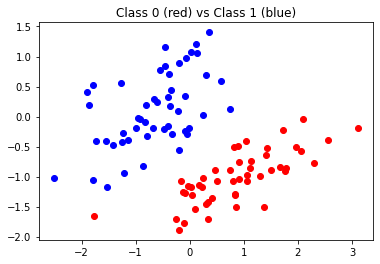

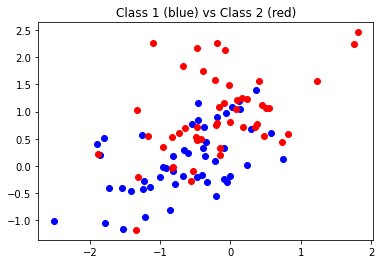

In [2]:
colors = ['r','b','r']

plt.title("Class 0 (red) vs Class 1 (blue)")
for c in np.unique(YA):
        plt.plot( XA[YA==c,0], XA[YA==c,1], 'o',
                       color=colors[int(c)] )
plt.show() #linearly seperable scatter data

plt.title("Class 1 (blue) vs Class 2 (red)")
for c in np.unique(YB):
        plt.plot( XB[YB==c,0], XB[YB==c,1], 'o',
                       color=colors[int(c)] )
plt.show() #not linearly seperable scatter data

2: Upon completing in the function plotBoundary, construct two learner objects for each of the datasets and generate two plots with decision boundaries

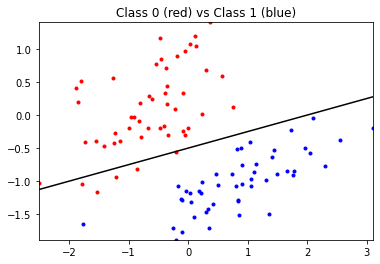

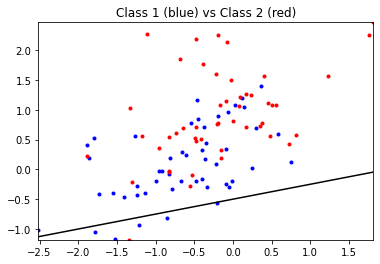

In [3]:
"""
Added to plotBoundary:
        b2x = (self.theta[0] + self.theta[1] * x1b[0])/-self.theta[2]
        b2y = (self.theta[0] + self.theta[1] * x1b[1])/-self.theta[2]
        x2b = np.array([b2x, b2y]); 
"""

import mltools as ml
from logisticClassify2 import *

learner_A = logisticClassify2(); # create "blank" learner 
learner_A.classes = np.unique(YA) # define class labels using YA or YB 
wts_A = np.array([.5,-.25,1]); # TODO: fill in values
learner_A.theta = wts_A; # set the learner’s parameters

plt.title("Class 0 (red) vs Class 1 (blue)")
learner_A.plotBoundary(XA, YA)
plt.show()

learner_B = logisticClassify2(); # create "blank" learner 
learner_B.classes = np.unique(YB) # define class labels using YA or YB 
wts_B = np.array([.5,-.25,1]); # TODO: fill in values
learner_B.theta = wts_B; # set the learner’s parameters

plt.title("Class 1 (blue) vs Class 2 (red)")
learner_B.plotBoundary(XB, YB)
plt.show()

3: Upon completing the predict funciton, calculate the error of both datasets

In [4]:
"""
Predict funciton
def predict(self, X):
        #Return the predictied class of each data point in X
        #raise NotImplementedError
        ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
        ##       else predict class 0:  Yhat[i] = self.classes[0]
        Yhat = []
        for i in range(X.shape[0]):
            r = self.theta[0] + self.theta[1] * X[i,0] + self.theta[2] * X[i,1]
            if r > 0:  
                Yhat.append(self.classes[1])
            else:  
                Yhat.append(self.classes[0])
        Yhat = np.array(Yhat)
        return Yhat
"""
print("The error rate for Y_hat_A and YA is:", learner_A.err(XA,YA))
print("The error rate for Y_hat_B and YB is:", learner_B.err(XB,YB))

The error rate for Y_hat_A and YA is: 0.050505050505050504
The error rate for Y_hat_B and YB is: 0.46464646464646464


4: To verify the predict code, use plotClassify2D

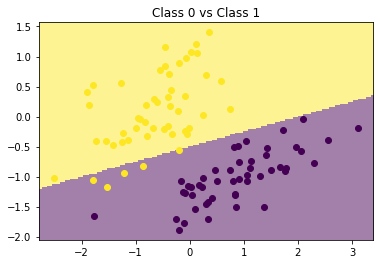

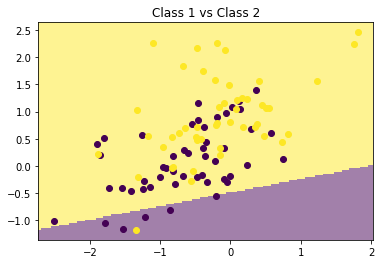

In [5]:
plt.title("Class 0 vs Class 1")
ml.plotClassify2D(learner_A, XA, YA)
plt.show()

plt.title("Class 1 vs Class 2")
ml.plotClassify2D(learner_B, XB, YB)
plt.show()

5: 

The **logistic negative log likelihood loss** for a single data point j:

$$J_{j}(\theta) = -y^{(j)} log \sigma(x^{(j)}\theta^T) - (1 - y^{(j)}) log (1 -  \sigma(x^{(j)}\theta^T))$$ 


The **gradient of the negative log likelihood** $J_{j}$ for logistic regression:

$$\frac{\partial}{\partial \theta_{j}} J_{j}(\theta) = \frac{\partial}{\partial \theta_{j}} (-y^{(j)} log \sigma(x^{(j)}\theta^T) - (1 - y^{(j)}) log (1 -  \sigma(x^{(j)}\theta^T)))$$

$$\frac{\partial}{\partial \theta_{j}} J_{j}(\theta) = \frac{-y^{(j)}\sigma(x^{(j)}\theta^T)(1-\sigma(x^{(j)}\theta^T))(x^{(j)})}{\sigma(x^{(j)}\theta^T)} - \frac{-(1 - y^{(j)})\sigma(x^{(j)}\theta^T)(1-\sigma(x^{(j)}\theta^T))(x^{(j)})} {1 -  \sigma(x^{(j)}\theta^T)}$$

$$\frac{\partial}{\partial \theta_{j}} J_{j}(\theta) = -y^{(j)}(1-\sigma(x^{(j)}\theta^T))(x^{(j)}) + (1 - y^{(j)})\sigma(x^{(j)}\theta^T)(x^{(j)}) $$

$$\frac{\partial}{\partial \theta_{j}} J_{j}(\theta) = (-y^{(j)}(1-\sigma(x^{(j)}\theta^T)) + (1 - y^{(j)})\sigma(x^{(j)}\theta^T))(x^{(j)}) $$

The **gradient of the negative log likelihood** $J_{j}$ for logistic regression for each theta:

$$\frac{\partial}{\partial \theta_{0}} J_{j}(\theta) = (-y^{(j)}(1-\sigma(x^{(j)}\theta^T)) + (1 - y^{(j)})\sigma(x^{(j)}\theta^T)) $$

$$\frac{\partial}{\partial \theta_{1}} J_{j}(\theta) = (-y^{(j)}(1-\sigma(x^{(j)}\theta^T)) + (1 - y^{(j)})\sigma(x^{(j)}\theta^T))(x_{1}) $$

$$\frac{\partial}{\partial \theta_{2}} J_{j}(\theta) = (-y^{(j)}(1-\sigma(x^{(j)}\theta^T)) + (1 - y^{(j)})\sigma(x^{(j)}\theta^T))(x_{2}) $$

6: Upon completing the train function to perform **stochastic gradient descent** on the logistic loss function

In [6]:
"""
Train function
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        #Train the logistic regression using stochastic gradient descent
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = XX[i].dot(self.theta);     # TODO: compute linear response r(x)
                sigma_r = 1 / (1 + np.exp(-ri))
                #derive_nll = sigma_r - YY[i]
                derive_nll = -YY[i] * (1 - sigma_r) + (1 - YY[i]) * sigma_r
                gradi = np.array([derive_nll, derive_nll * X[i,0], derive_nll * X[i,1]])                
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jsur = 0
            for i in range(X.shape[0]):
                ri    = XX[i].dot(self.theta);     # TODO: compute linear response r(x)
                sigma_r = 1 / (1 + np.exp(-ri))
                if YY[i] > 0:
                    Jsur += -np.log(sigma_r)
                else:
                    Jsur += -np.log(1 - sigma_r)
            
            Jnll.append(Jsur/M) # TODO evaluate the current NLL loss
            #Moved the draw and plot to only have final result instead of every step
            #plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            #if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            #plt.pause(.01); # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if epoch > stopEpochs:
                done = True;
            elif len(Jnll) > 1 and np.absolute(Jnll[-1] - Jnll[-2]) < stopTol: 
                done = True; # or if Jnll not changing between epochs ( < stopTol )
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
        if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
        plt.pause(.01); # let OS draw the plot
"""
print()

7: Upon running the train funcitons on our datasets, (XA and YA) and (XB and YB), we get the following results:

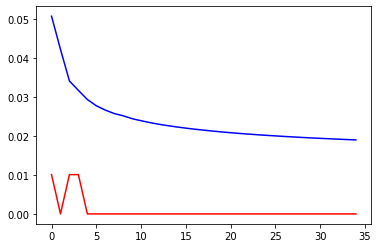

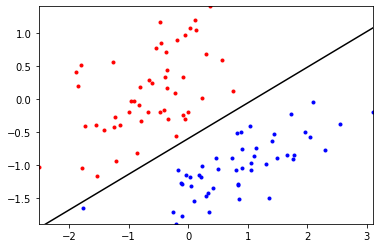

The loss for train is: 0.019020425330386993
The parameters are XA, YA, and the default parameters for the rest.
The error rate for Y_hat_A and YA is: 0.0
The thetas are: [ 4.44075225 -4.0005054   7.41461151]


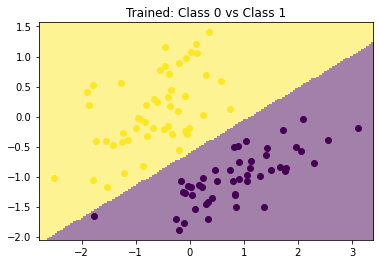

In [7]:
learner_A.theta = np.array([.5,-.25,1])
learner_A.train(XA,YA)
print("The parameters are XA, YA, and the default parameters for the rest.")
print("The error rate for Y_hat_A and YA is:", learner_A.err(XA,YA))
print("The thetas are:", learner_A.theta)
plt.title("Trained: Class 0 vs Class 1")
ml.plotClassify2D(learner_A,XA,YA)  
plt.show()

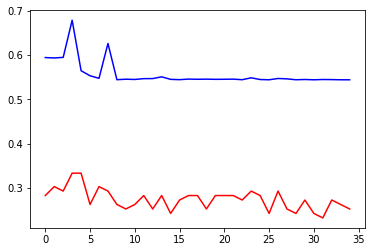

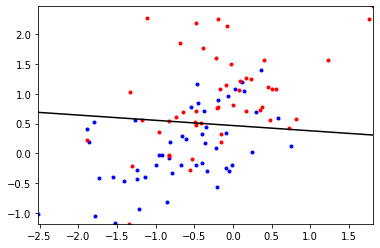

The loss for train is: 0.544130067293224
The parameters are XB, YB, and the default parameters for the rest.
The error rate for Y_hat_B and YB is: 0.25252525252525254
The thetas are: [-0.7810476   0.14704536  1.67554832]


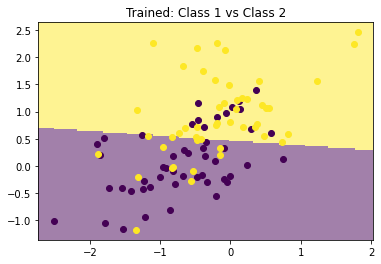

In [8]:
learner_B.theta = np.array([.5,-.25,1])
learner_B.train(XB,YB)
print("The parameters are XB, YB, and the default parameters for the rest.")
print("The error rate for Y_hat_B and YB is:", learner_B.err(XB,YB))
print("The thetas are:", learner_B.theta)
plt.title("Trained: Class 1 vs Class 2")
ml.plotClassify2D(learner_B,XB,YB)
plt.show()

8: 

The **logistic negative log likelihood loss** for a single data point j with L1 regularizaiton:

$$J_{j}(\theta) = -y^{(j)} log \sigma(x^{(j)}\theta^T) - (1 - y^{(j)}) log (1 -  \sigma(x^{(j)}\theta^T)) + \alpha\left\lvert \theta_{j} \right\rvert$$ 


The **gradient of the negative log likelihood** $J_{j}$ for logistic regression with L1 regularizaiton:

$$\frac{\partial}{\partial \theta_{j}} J_{j}(\theta) = (-y^{(j)}(1-\sigma(x^{(j)}\theta^T)) + (1 - y^{(j)})\sigma(x^{(j)}\theta^T))(x^{(j)}) ^{+}_{-} \alpha$$

Upon updating the surrogate loss function and gradient with the L1 regularization, the alpha that gave noticeably different results was .5 because starting at approximately .5, the error starts increasing at a higher rate, but also unstable(like static looking).
This could be due to alpha becoming large enough to make the model simple enough to create underfit of the data, and also be easily impacted causing extreme and noticeably different results.

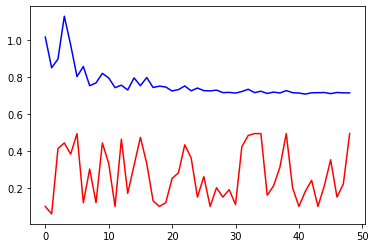

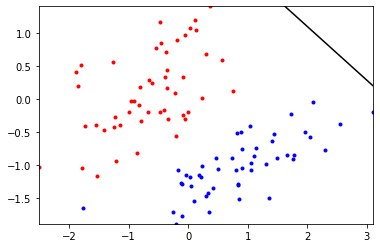

The loss for train with L1 Regularization is: 0.7150315464212346
The error rate for Y_hat_A and YA is: 0.494949494949495
The thetas are: [ 0.02662033 -0.00792914 -0.00976103]


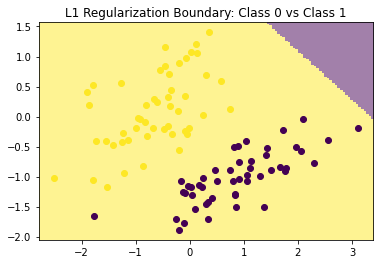

In [9]:
#learner_A.theta = np.array([.5,-.25,1])
learner_A.theta = []
learner_A.trainL1(XA, YA, alpha = .5)
print("The error rate for Y_hat_A and YA is:", learner_A.err(XA,YA))
print("The thetas are:", learner_A.theta)
plt.title("L1 Regularization Boundary: Class 0 vs Class 1")
ml.plotClassify2D(learner_A, XA, YA)
plt.show()

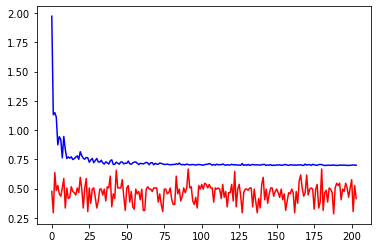

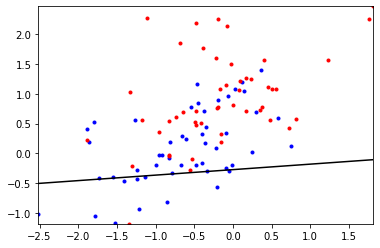

The loss for train with L1 Regularization is: 0.699447296976002
The error rate for Y_hat_B and YB is: 0.41414141414141414
The thetas are: [ 0.00345782 -0.00116464  0.01266959]


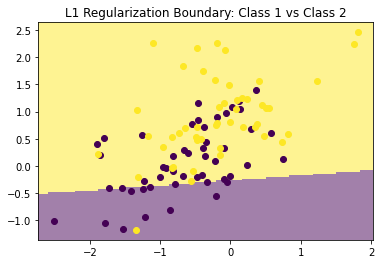

In [10]:
#learner_B.theta = np.array([.5,-.25,1])
learner_B.theta = []
learner_B.trainL1(XB, YB, alpha = .5)
print("The error rate for Y_hat_B and YB is:", learner_B.err(XB,YB))
print("The thetas are:", learner_B.theta)
plt.title("L1 Regularization Boundary: Class 1 vs Class 2")
ml.plotClassify2D(learner_B, XB, YB)
plt.show()

9: 

The **logistic negative log likelihood loss** for a single data point j with L2 regularizaiton:

$$J_{j}(\theta) = -y^{(j)} log \sigma(x^{(j)}\theta^T) - (1 - y^{(j)}) log (1 -  \sigma(x^{(j)}\theta^T)) + \alpha(\theta_{j})^{2}$$ 


The **gradient of the negative log likelihood** $J_{j}$ for logistic regression with L2 regularizaiton:

$$\frac{\partial}{\partial \theta_{j}} J_{j}(\theta) = (-y^{(j)}(1-\sigma(x^{(j)}\theta^T)) + (1 - y^{(j)})\sigma(x^{(j)}\theta^T))(x^{(j)}) + 2\alpha\theta_{j}$$

Upon updating the surrogate loss function and gradient with the L2 regularization, the alpha that gave noticeably different results was .75 because at approximately .75 the error rate starts to grow at a much lower rate.
This could be due to alpha become large enough to make the model simple to create underfit but as alpha grows it converges towards the probabilty of one set of the two data, so it has threshold around .5 error regarding our data.

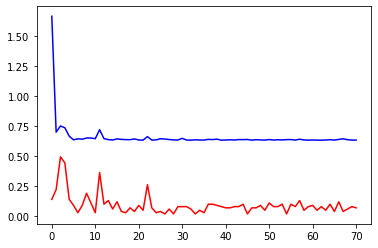

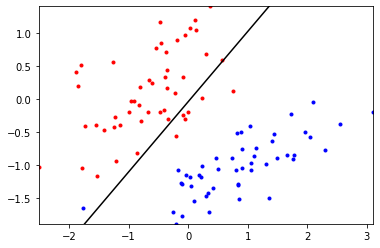

The loss for train with L2 Regularization is: 0.6335375611175338
The error rate for Y_hat_A and YA is: 0.0707070707070707
The thetas are: [ 0.00700015 -0.18188768  0.17132175]


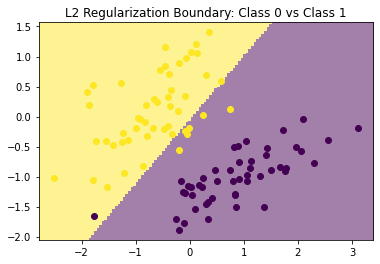

In [11]:
#learner_A.theta = np.array([.5,-.25,1])
learner_A.theta = []
learner_A.trainL2(XA, YA, alpha = .75)
print("The error rate for Y_hat_A and YA is:", learner_A.err(XA,YA))
print("The thetas are:", learner_A.theta)
plt.title("L2 Regularization Boundary: Class 0 vs Class 1")
ml.plotClassify2D(learner_A, XA, YA)
plt.show()

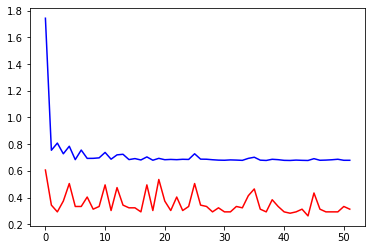

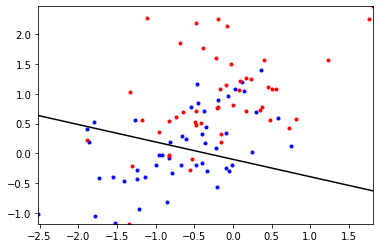

The loss for train with L2 Regularization is: 0.6790625812805352
The error rate for Y_hat_B and YB is: 0.31313131313131315
The thetas are: [0.01381324 0.04022943 0.1379868 ]


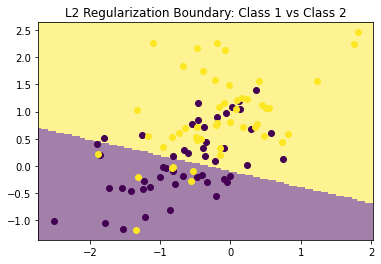

In [12]:
#learner_B.theta = np.array([.5,-.25,1])
learner_B.theta = []
learner_B.trainL2(XB, YB, alpha = .75)
print("The error rate for Y_hat_B and YB is:", learner_B.err(XB,YB))
print("The thetas are:", learner_B.theta)
plt.title("L2 Regularization Boundary: Class 1 vs Class 2")
ml.plotClassify2D(learner_B, XB, YB)
plt.show()

10:
The major differences between L1 and L2 regularization is L1 taking absolute of theta and L2 taking the square of the theta then multiplying by alpha before adding to the loss or gradient. L1 also encourages the thetas or weights to be zero, whereas L2 encourages the weights to be towards zero.
The regularization method that best fits this problem in a better way is L2 because on average its error rate and loss as alpha increases, increases at a much lower rate and consistent rate than L1, especially with linearly seperable data. And L2 actaully converges towards approximately .5 or probabilty of one of the sets of data at a much higher alpha, whereas L1 is more static and has a higher convergence of error, so it can surpass .5 but also have an error of .5 at a much lower error than L2.

Statement of Collaboration:
I, Andy Quoc Anh Dinh Tran, did this assignment by myself.